---
title: 'Essential Tools: Pandas'
jupyter: python3
code-fold: false
---

::: {.content-visible when-profile="web"}
## Introduction

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tools4ds/DS701-Course-Notes/blob/main/ds701_book/jupyter_notebooks/02B-Pandas.ipynb)

In this lecture we discuss one of most useful Python packages for data
science -- Pandas.

We'll touch on some highlights here, but to learn more, start with the
[Pandas Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)
:::

## Pandas

::: {.incremental}

- [Pandas](https://pandas.pydata.org/docs/index.html) is a Python library for data
manipulation and analysis with an emphasis on tabular data.
- It can be used to produce high quality plots and integrates nicely with other
  libraries that expect NumPy arrays.
- Knowledge and use of Pandas is essential as a data scientist.
:::

:::: {.fragment}
The most important data structure provided by Pandas is the `DataFrame`
implemented in the
[DataFrame](https://pandas.pydata.org/docs/reference/frame.html) class.
::::

:::: {.fragment}
Unlike a numpy array, a `DataFrame` can have columns of different types.
::::

:::: {.fragment}
Make it a habit that when you're given a tabular dataset, load it into a `DataFrame`.
::::

## Fetching, storing and retrieving your data

We'll work with stock data. A popular python package for this is `yfinance`, but
there seems to be some access rate limits which make it more difficult to use.

Instead we'll manually download a CSV file:

    MANUAL DOWNLOAD FROM WALL STREET JOURNAL:
    
    1. Go to: https://www.wsj.com/market-data/quotes/NVDA/historical-prices
    2. Set date range: January 1, 2024 to December 31, 2024
    3. Click "Download" button
    4. Save the CSV file
    5. Load in Python:

In [1]:
import pandas as pd

try:
    nvidia_stocks = pd.read_csv('data/stocks/nvidia_stock_2024.csv', index_col=0)
except FileNotFoundError:
    url = 'https://raw.githubusercontent.com/tools4ds/DS701-Course-Notes/main/ds701_book/data/stocks/nvidia_stock_2024.csv'
    nvidia_stocks = pd.read_csv(url, index_col=0)

nvidia_stocks = nvidia_stocks.sort_index()

---

It's important to inspect the data you are working with and Pandas provides a
variety of methods to do so such as `.head()`, `.tail()`, `.info()`,
`.describe()`, etc.

In [2]:
#| code-fold: false
nvidia_stocks.head()

,Open,High,Low,Close,Volume
Date,,,,,
01/02/24,49.244,49.2950,47.595,48.168,4.112542e+08
01/03/24,47.485,48.1841,47.320,47.569,3.208962e+08
01/04/24,47.767,48.5000,47.508,47.998,3.065349e+08
01/05/24,48.462,49.5470,48.306,49.097,4.150393e+08
01/08/24,49.512,52.2750,49.479,52.253,6.425099e+08


Notice how each row has a label and each column has a label.

---

A DataFrame is a python object that has many associated methods to explore and
manipulate the data.

The method `.info()` gives you a description of the dataframe.

In [3]:
nvidia_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 01/02/24 to 12/31/24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    252 non-null    float64
 1   High    252 non-null    float64
 2   Low     252 non-null    float64
 3   Close   252 non-null    float64
 4   Volume  252 non-null    float64
dtypes: float64(5)
memory usage: 11.8+ KB


---

The method `.describe()` gives you summary statistics of the dataframe.

In [4]:
nvidia_stocks.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,107.899121,109.852719,105.631198,107.825438,3.773571e+08
std,27.145281,27.437677,26.575767,26.957320,1.618595e+08
min,47.485000,48.184100,47.320000,47.569000,1.051570e+08
25%,87.740500,89.479750,86.128550,87.751500,2.498443e+08
50%,115.950000,117.090000,111.791500,115.295000,3.508633e+08
75%,130.282500,133.542500,128.235000,130.462500,4.752442e+08
max,149.350000,152.890000,146.260000,148.880000,1.142269e+09


## Writing/Reading to/from a ``.csv`` file

Pandas can read and write dataframes with many file formats such as `.csv`, `.json`, `.parquet`,
`.xlsx`, `.html`, `SQL`, etc.

Here we write the dataframe to a `.csv` file.

In [5]:
nvidia_stocks.to_csv('nvidia_data.csv')

We can escape a shell command using the `!` operator to see the top of the file.

In [6]:
!head nvidia_data.csv

Date,Open,High,Low,Close,Volume
01/02/24,49.244,49.295,47.595,48.168,411254215.887458
01/03/24,47.485,48.1841,47.32,47.569,320896186.791038
01/04/24,47.767,48.5,47.508,47.998,306534876.934651
01/05/24,48.462,49.547,48.306,49.097,415039295.849607
01/08/24,49.512,52.275,49.479,52.253,642509873.574901
01/09/24,52.401,54.325,51.69,53.14,773100072.268999
01/10/24,53.616,54.6,53.489,54.35,533795774.662042
01/11/24,54.999,55.346,53.56,54.822,596758784.032412
01/12/24,54.62,54.97,54.3301,54.71,352993586.470064


---

And of course we can likewise read a `.csv` file into a dataframe.  This is probably the most common way you will get data into Pandas.

In [7]:
df = pd.read_csv('nvidia_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,01/02/24,49.244,49.2950,47.595,48.168,4.112542e+08
1,01/03/24,47.485,48.1841,47.320,47.569,3.208962e+08
2,01/04/24,47.767,48.5000,47.508,47.998,3.065349e+08
3,01/05/24,48.462,49.5470,48.306,49.097,4.150393e+08
4,01/08/24,49.512,52.2750,49.479,52.253,6.425099e+08


::: {.callout-caution}
But be careful, the index column is not automatically set.
:::

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.9+ KB


Note the index description.

---

To set the index column, we can use the `index_col` parameter.

In [9]:
df = pd.read_csv('nvidia_data.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 01/02/24 to 12/31/24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    252 non-null    float64
 1   High    252 non-null    float64
 2   Low     252 non-null    float64
 3   Close   252 non-null    float64
 4   Volume  252 non-null    float64
dtypes: float64(5)
memory usage: 11.8+ KB


## Working with data columns

In general, we'll typically describe the rows in the dataframe as **items**
(or **observations** or **data samples**) and the columns as **features**.

In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Pandas allows you to reference a column similar to a python dictionary key,
using column names in square brackets.

In [11]:
df['Open']

Date
01/02/24     49.244
01/03/24     47.485
01/04/24     47.767
01/05/24     48.462
01/08/24     49.512
             ...   
12/24/24    140.000
12/26/24    139.700
12/27/24    138.550
12/30/24    134.830
12/31/24    138.030
Name: Open, Length: 252, dtype: float64

Note that this returns a `Series` object, the other fundamental data structure in Pandas.

In [12]:
type(df['Open'])

pandas.core.series.Series

Also note that Series is indexed in this case by dates rather than simple integers.

---

Pandas also allows you to refer to columns using an object attribute syntax.

Note that the column name cannot include a space in this case.

In [13]:
df.Open

Date
01/02/24     49.244
01/03/24     47.485
01/04/24     47.767
01/05/24     48.462
01/08/24     49.512
             ...   
12/24/24    140.000
12/26/24    139.700
12/27/24    138.550
12/30/24    134.830
12/31/24    138.030
Name: Open, Length: 252, dtype: float64

---

You can select a list of columns:

In [14]:
df[['Open', 'Close']].head()

,Open,Close
Date,,
01/02/24,49.244,48.168
01/03/24,47.485,47.569
01/04/24,47.767,47.998
01/05/24,48.462,49.097
01/08/24,49.512,52.253


Which is just another dataframe, which is why we can chain the `.head()` method.

In [15]:
type(df[['Open', 'Close']])

pandas.core.frame.DataFrame

---

Changing column names is as simple as assigning to the `.columns` property.

Let's adjust the column names to remove spaces.

In [16]:
new_column_names = [x.lower().replace(' ', '_') for x in df.columns]
df.columns = new_column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 01/02/24 to 12/31/24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    float64
 1   high    252 non-null    float64
 2   low     252 non-null    float64
 3   close   252 non-null    float64
 4   volume  252 non-null    float64
dtypes: float64(5)
memory usage: 19.9+ KB


Observe that we first created a list of column names without spaces using __list comprehension__. This is the pythonic way to generate a new list.

Now **all** columns can be accessed using the **dot** notation.


## A sampling of DataFrame methods.

There are many useful methods in the DataFrame object. It is important to
familiarize yourself with these methods.

The following methods calculate the mean, standard deviation, and median of the specified numeric columns.

In [17]:
df.mean()

open      1.078991e+02
high      1.098527e+02
low       1.056312e+02
close     1.078254e+02
volume    3.773571e+08
dtype: float64

or we can give a list of columns to the Dataframe object:

In [18]:
df[['open', 'close', 'volume']].mean()

open      1.078991e+02
close     1.078254e+02
volume    3.773571e+08
dtype: float64

In [19]:
df.std()

open      2.714528e+01
high      2.743768e+01
low       2.657577e+01
close     2.695732e+01
volume    1.618595e+08
dtype: float64

In [20]:
df.median()

open      1.159500e+02
high      1.170900e+02
low       1.117915e+02
close     1.152950e+02
volume    3.508633e+08
dtype: float64

Or apply the method to a single column:

In [21]:
df.open.mean()

107.89912063492064

In [22]:
df.high.mean()

109.85271904761905

## Plotting methods

Pandas also wraps `matplotlib` and provides a variety of easy-to-use plotting
functions directly from the dataframe object.

These are your "first look" functions and useful in exploratory data analysis.

Later, we will use more specialized graphics packages to create more
sophisticated visualizations.

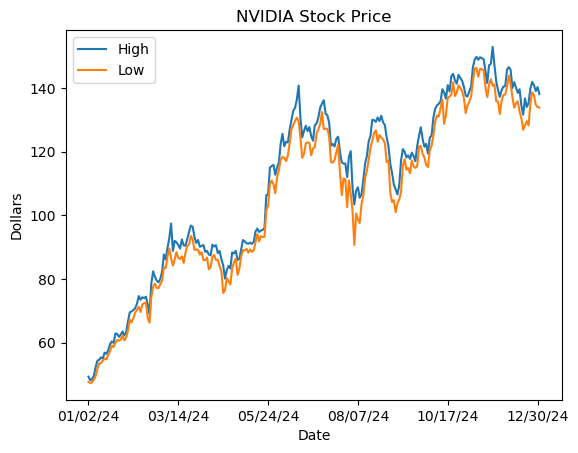

In [23]:
import matplotlib.pyplot as plt

df.high.plot(label='High')
df.low.plot(label='Low')
plt.title('NVIDIA Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best')
plt.show()

---

Or a histogram on the adjusted closing price.

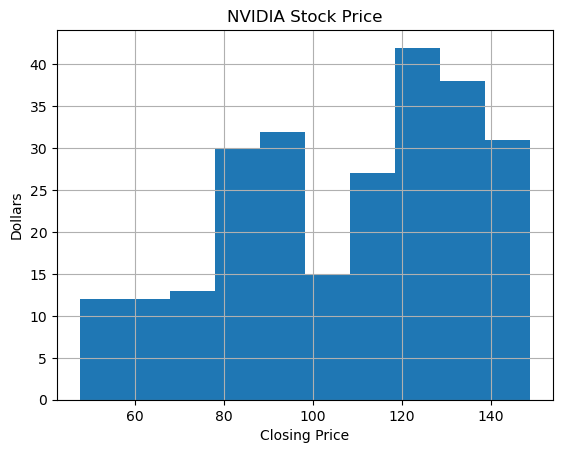

In [24]:
df.close.hist()
plt.xlabel('Closing Price')
plt.ylabel('Dollars')
plt.title('NVIDIA Stock Price')
plt.show()

## Accessing rows of the DataFrame

So far we've seen how to access a column of the DataFrame. To access a row we use different syntax.

To access a row by its index label, use the **`.loc()`** method ('location').

In [25]:
df.loc['01/02/24']

open      4.924400e+01
high      4.929500e+01
low       4.759500e+01
close     4.816800e+01
volume    4.112542e+08
Name: 01/02/24, dtype: float64

As a tangent, we can use the `.apply()` method to format the output.

In [26]:
df.loc['01/02/24'].apply(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

open               49.24
high               49.30
low                47.59
close              48.17
volume    411,254,215.89
Name: 01/02/24, dtype: object

---

To access a row by its index number (i.e., like an array index), use **`.iloc()`** ('integer location')

In [27]:
df.iloc[0, :]

open      4.924400e+01
high      4.929500e+01
low       4.759500e+01
close     4.816800e+01
volume    4.112542e+08
Name: 01/02/24, dtype: float64

and similarly formatted:

In [28]:
df.iloc[0, :].apply(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

open               49.24
high               49.30
low                47.59
close              48.17
volume    411,254,215.89
Name: 01/02/24, dtype: object

---

To iterate over the rows you can use **`.iterrows()`**.

In [29]:
num_positive_days = 0
for idx, row in df.iterrows():
    if row.close > row.open:
        num_positive_days += 1

print(f"The total number of positive-gain days is {num_positive_days} out of {len(df)} days or as percentage {num_positive_days/len(df):.2%}")

The total number of positive-gain days is 134 out of 252 days or as percentage 53.17%


::: {.callout-note}
This is only capturing the intraday gain/loss, not the cumulative inter-day gain/loss.
:::

## Filtering

It is easy to select rows from the data.  

All the operations below return a new Series or DataFrame, which itself can be
treated the same way as all Series and DataFrames we have seen so far.

In [30]:
tmp_high = df.high > 100
tmp_high.tail()

Date
12/24/24    True
12/26/24    True
12/27/24    True
12/30/24    True
12/31/24    True
Name: high, dtype: bool

Summing a Boolean array is the same as counting the number of `True` values.

In [31]:
sum(tmp_high)

153

---

Now, let's select only the rows of `df` that correspond to `tmp_high`.

::: {.callout-note}
We can pass a series to the dataframe to select rows.
:::

In [32]:
df[tmp_high]

,open,high,low,close,volume
Date,,,,,
05/23/24,102.028,106.3200,101.520,103.799,8.350653e+08
05/24/24,104.449,106.4750,103.000,106.469,4.294937e+08
05/28/24,110.244,114.9390,109.883,113.901,6.527280e+08
05/29/24,113.050,115.4920,110.901,114.825,5.574419e+08
05/30/24,114.650,115.8192,109.663,110.500,4.873503e+08
...,...,...,...,...,...
12/24/24,140.000,141.9000,138.650,140.220,1.051570e+08
12/26/24,139.700,140.8500,137.730,139.930,1.165191e+08
12/27/24,138.550,139.0200,134.710,137.010,1.705826e+08


---

Putting it all together, we can count the number of positive days without iterating over the rows.

In [33]:
positive_days = df[df.close > df.open]
print(f"Total number of positive-gain days is {len(positive_days)}")
positive_days.head()

Total number of positive-gain days is 134


,open,high,low,close,volume
Date,,,,,
01/03/24,47.485,48.1841,47.320,47.569,3.208962e+08
01/04/24,47.767,48.5000,47.508,47.998,3.065349e+08
01/05/24,48.462,49.5470,48.306,49.097,4.150393e+08
01/08/24,49.512,52.2750,49.479,52.253,6.425099e+08
01/09/24,52.401,54.3250,51.690,53.140,7.731001e+08


---

Or count the number of days with a gain of more than $2.

In [34]:
very_positive_days = df[(df.close - df.open) > 2]
print(f"Total number of days with gain > $2 is {len(very_positive_days)}")
very_positive_days.head()

Total number of days with gain > $2 is 51


,open,high,low,close,volume
Date,,,,,
01/08/24,49.512,52.275,49.479,52.253,6.425099e+08
02/02/24,63.974,66.600,63.690,66.160,4.765777e+08
02/22/24,75.025,78.575,74.220,78.538,8.650997e+08
03/01/24,80.000,82.300,79.435,82.279,4.791351e+08
03/07/24,90.158,92.767,89.602,92.669,6.081191e+08


Note that this doesn't the explain the total gain for the year. Why?

## Creating new columns

To create a new column, simply assign values to it. The column name is similar to a key in a dictionary.

Let's look at the daily change in closing price.

In [35]:
# Calculate the daily change in closing price
df['daily_change'] = df['close'].diff()

# Create the cumulative profit column
df['cum_profit'] = df['daily_change'].cumsum()

# Display the first few rows to verify the new column
print(df[['close', 'daily_change', 'cum_profit']].head())

           close  daily_change  cum_profit
Date                                      
01/02/24  48.168           NaN         NaN
01/03/24  47.569        -0.599      -0.599
01/04/24  47.998         0.429      -0.170
01/05/24  49.097         1.099       0.929
01/08/24  52.253         3.156       4.085


It is convenient that `.diff()` by default is the difference between the current and previous row.

---

Let's look at the histogram of the daily change in stock price.

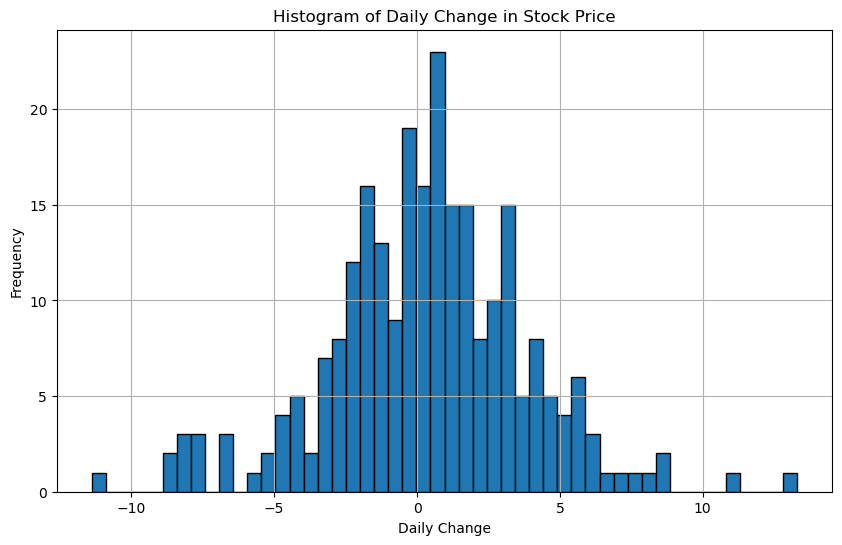

In [36]:
# Plot histogram of daily_change
plt.figure(figsize=(10, 6))
df['daily_change'].hist(bins=50, edgecolor='black')
plt.title('Histogram of Daily Change in Stock Price')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.show()

---

Let's give each row a `gain` value as a categorical variable.

In [37]:
for idx, row in df.iterrows():
    if row.daily_change < 0:
        df.loc[idx,'cat_gain']='negative'
    elif row.daily_change < 1:
        df.loc[idx,'cat_gain']='small_gain'
    elif row.daily_change < 2:
        df.loc[idx,'cat_gain']='medium_gain'
    elif row.daily_change >= 2:
        df.loc[idx,'cat_gain']='large_gain'
df.head()

,open,high,low,close,volume,daily_change,cum_profit,cat_gain
Date,,,,,,,,
01/02/24,49.244,49.2950,47.595,48.168,4.112542e+08,NaN,NaN,NaN
01/03/24,47.485,48.1841,47.320,47.569,3.208962e+08,-0.599,-0.599,negative
01/04/24,47.767,48.5000,47.508,47.998,3.065349e+08,0.429,-0.170,small_gain
01/05/24,48.462,49.5470,48.306,49.097,4.150393e+08,1.099,0.929,medium_gain
01/08/24,49.512,52.2750,49.479,52.253,6.425099e+08,3.156,4.085,large_gain


---

Here is another, more "functional", way to accomplish the same thing.

First, let's drop the gain column so we can start fresh.

In [38]:
df.drop('cat_gain', axis=1, inplace=True)
df.head()

,open,high,low,close,volume,daily_change,cum_profit
Date,,,,,,,
01/02/24,49.244,49.2950,47.595,48.168,4.112542e+08,NaN,NaN
01/03/24,47.485,48.1841,47.320,47.569,3.208962e+08,-0.599,-0.599
01/04/24,47.767,48.5000,47.508,47.998,3.065349e+08,0.429,-0.170
01/05/24,48.462,49.5470,48.306,49.097,4.150393e+08,1.099,0.929
01/08/24,49.512,52.2750,49.479,52.253,6.425099e+08,3.156,4.085


---

Define a function that classifies rows, and `apply` it to each row.

In [39]:
def namerow(row):
    if row.daily_change < 0:
        return 'negative'
    elif row.daily_change < 1:
        return 'small_gain'
    elif row.daily_change < 2:
        return 'medium_gain'
    elif row.daily_change >= 2:
        return 'large_gain'

df['cat_gain'] = df.apply(namerow, axis=1)
df.head()

,open,high,low,close,volume,daily_change,cum_profit,cat_gain
Date,,,,,,,,
01/02/24,49.244,49.2950,47.595,48.168,4.112542e+08,NaN,NaN,None
01/03/24,47.485,48.1841,47.320,47.569,3.208962e+08,-0.599,-0.599,negative
01/04/24,47.767,48.5000,47.508,47.998,3.065349e+08,0.429,-0.170,small_gain
01/05/24,48.462,49.5470,48.306,49.097,4.150393e+08,1.099,0.929,medium_gain
01/08/24,49.512,52.2750,49.479,52.253,6.425099e+08,3.156,4.085,large_gain


## Grouping

A powerful DataFrame method is `groupby()`.

This is analagous to `GROUP BY` in SQL.

It will group the rows of a DataFrame by the values in one (or more) columns and let you iterate through each group.

Here we will look at the average gain among the categories of gains (negative, small, medium, and large) we defined above and stored in the column `gain`.

In [40]:
gain_groups = df.groupby(by='cat_gain')

---

Essentially, `gain_groups` behaves like a dictionary:

* the keys are the unique values found in the `gain` column, and
* the values are DataFrames that contain only the rows having the corresponding unique values.

In [41]:
for gain, gain_data in gain_groups:
    print(gain)
    print(gain_data[['close', 'daily_change']].head())
    print('=============================')

large_gain
           close  daily_change
Date                          
01/08/24  52.253         3.156
01/19/24  59.491         2.384
02/02/24  66.160         3.133
02/05/24  69.332         3.172
02/09/24  72.133         2.492
medium_gain
           close  daily_change
Date                          
01/05/24  49.097         1.099
01/10/24  54.350         1.210
01/16/24  56.382         1.672
01/18/24  57.107         1.054
01/24/24  61.362         1.489
negative
           close  daily_change
Date                          
01/03/24  47.569        -0.599
01/12/24  54.710        -0.112
01/17/24  56.053        -0.329
01/26/24  61.031        -0.586
01/31/24  61.527        -1.247
small_gain
           close  daily_change
Date                          
01/04/24  47.998         0.429
01/09/24  53.140         0.887
01/11/24  54.822         0.472
01/22/24  59.654         0.163
01/23/24  59.873         0.219


In [42]:
for gain, gain_data in df.groupby("cat_gain"):
    print('The average daily change for the {} group is {}'.format(gain,
                                                           gain_data.daily_change.mean()))

The average daily change for the large_gain group is 4.327944444444444
The average daily change for the medium_gain group is 1.4808620689655185
The average daily change for the negative group is -2.603463963963963
The average daily change for the small_gain group is 0.5269102564102557


## Other Pandas Classes

A DataFrame is essentially an annotated 2-D array.

Pandas also has annotated versions of 1-D and 3-D arrays.

A 1-D array in Pandas is called a [Series](https://pandas.pydata.org/docs/reference/series.html).
You can think of DataFrames as a dictionary of Series.

A 3-D array in Pandas is created using a
[MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#).

For more information read the documentation.


## In Class Activity

### Iris Flower Analysis with Pandas
**Duration:** 20-25 minutes | **Teams:** 3 students each

#### Dataset: Iris Flower Dataset
**Download Instructions:**
The Iris dataset is built into seaborn, so no download needed!

In [43]:
import pandas as pd
import seaborn as sns

# Load the Iris dataset directly
iris = sns.load_dataset('iris')

#### Team Roles (2 minutes)
- **Data Loader:** Loads data and explores structure
- **Data Analyzer:** Performs calculations and filtering  
- **Data Visualizer:** Creates plots and charts

#### Activity Tasks (20 minutes)

**Phase 1: Data Loading & Exploration (5 minutes)**
1. Check the shape and column names
2. Use `.head()`, `.info()`, and `.describe()` to explore the data

In [44]:
# Replace 0 and '[]' with the correct methods on iris
print(f"Dataset shape: {iris.shape}")
print(f"Columns: {iris.columns}")

# Look at the first few rows
print("First 5 rows:",iris.head(5))

# Get basic info about the dataset
print("\nDataset Info:")
print(iris.info())

# Describe the dataset with summary statistics
print("\nSummary Statistics:")
print(iris.describe())


Dataset shape: (150, 5)
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
First 5 rows:    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory us

**Phase 2: Basic Data Manipulation (8 minutes)**
1. **Create new columns:**
   - Add a 'petal_area' column (petal_length × petal_width)
   - Create a 'sepal_area' column (sepal_length × sepal_width)
   - Create a 'size_category' column:
     - 'Small' (petal_area < 2)
     - 'Medium' (petal_area 2-5)
     - 'Large' (petal_area > 5)

In [45]:
# Create petal area column
iris['petal_area'] = iris['petal_length'] * iris['petal_width']

# Create sepal area column
iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']

# Create size category column
def categorize_size(petal_area):
    if petal_area < 0.2:
        return 'Small'
    elif petal_area < 0.5:
        return 'Medium'
    else:
        return 'Large'

iris['size_category'] = iris['petal_area'].apply(categorize_size)

print("New columns created:",)
print(iris[['petal_length', 'petal_width', 'petal_area', 'size_category']].head(10))

New columns created:
   petal_length  petal_width  petal_area size_category
0           1.4          0.2        0.28        Medium
1           1.4          0.2        0.28        Medium
2           1.3          0.2        0.26        Medium
3           1.5          0.2        0.30        Medium
4           1.4          0.2        0.28        Medium
5           1.7          0.4        0.68         Large
6           1.4          0.3        0.42        Medium
7           1.5          0.2        0.30        Medium
8           1.4          0.2        0.28        Medium
9           1.5          0.1        0.15         Small


2. **Data Filtering:**
   - Find all 'setosa' species flowers
   - Filter for large flowers only
   - Find flowers with sepal_length > 6


In [46]:
# Find all 'setosa' species flowers
setosa_flowers = iris[iris.species == 'setosa']
print(f"Setosa flowers: {len(setosa_flowers)} out of {len(iris)}")

# Filter for large flowers only
large_flowers = iris[iris.size_category == 'Large']
print(f"Large flowers: {len(large_flowers)} out of {len(iris)}")

# Find flowers with sepal_length > 6
long_sepal = iris[iris.sepal_length > 6]
print(f"Flowers with sepal_length > 6: {len(long_sepal)} out of {len(iris)}")


Setosa flowers: 50 out of 150
Large flowers: 110 out of 150
Flowers with sepal_length > 6: 61 out of 150


3. **Basic Analysis:**
   - Count flowers by species
   - Find average petal length by species

In [47]:
# Count flowers by species
species_counts = iris['species'].value_counts()
print("Flowers by species:")
print(species_counts)

# Find average petal length by species
avg_petal_by_species = iris.groupby('species')['petal_length'].mean()
print("\nAverage petal length by species:")
print(avg_petal_by_species)

Flowers by species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Average petal length by species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


**Phase 3: Simple Visualizations (7 minutes)**
1. **Create 2-3 basic plots:**
   - Histogram of petal length
   - Bar chart of flower count by species
   - Scatter plot: sepal_length vs sepal_width


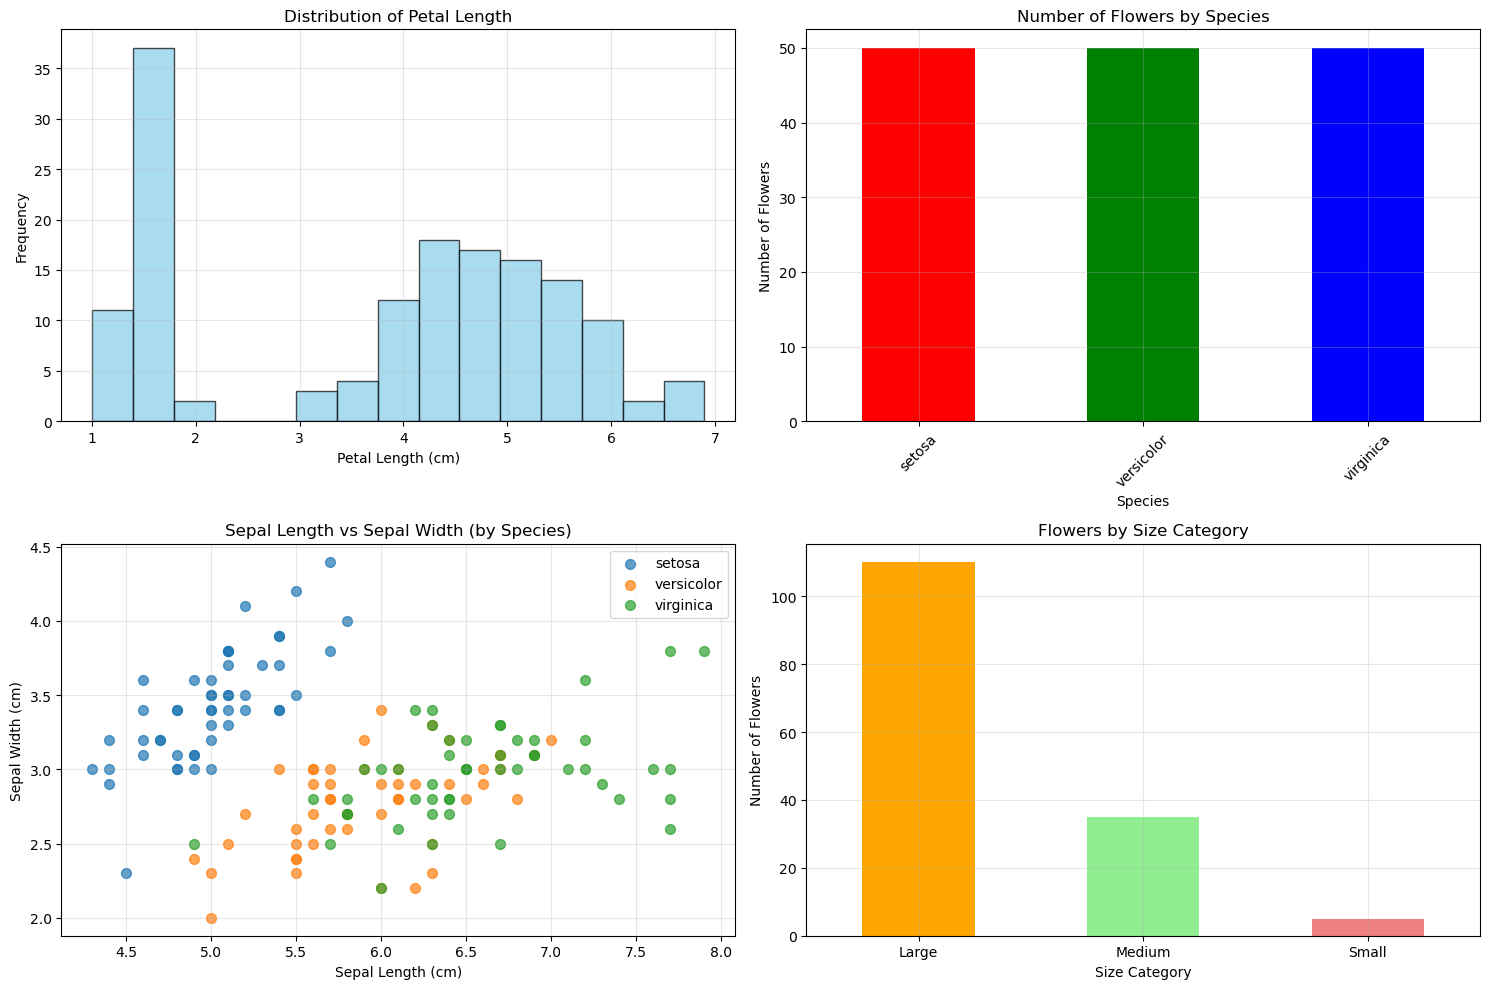

In [48]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram of petal length
axes[0, 0].hist(iris['petal_length'], bins=15, alpha=0.7, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution of Petal Length')
axes[0, 0].set_xlabel('Petal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar chart of flower count by species
species_counts = iris['species'].value_counts()
species_counts.plot(kind='bar', ax=axes[0, 1], color=['red', 'green', 'blue'])
axes[0, 1].set_title('Number of Flowers by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Number of Flowers')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: sepal_length vs sepal_width
for species in iris['species'].unique():
    data = iris[iris['species'] == species]
    axes[1, 0].scatter(data['sepal_length'], data['sepal_width'],
                      alpha=0.7, label=species, s=50)
axes[1, 0].set_title('Sepal Length vs Sepal Width (by Species)')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Sepal Width (cm)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar chart of size categories (if size_category column exists)
if 'size_category' in iris.columns:
    size_categories = iris['size_category'].value_counts()
    size_categories.plot(kind='bar', ax=axes[1, 1], color=['orange', 'lightgreen', 'lightcoral'])
    axes[1, 1].set_title('Flowers by Size Category')
    axes[1, 1].set_xlabel('Size Category')
    axes[1, 1].set_ylabel('Number of Flowers')
    axes[1, 1].tick_params(axis='x', rotation=0)
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Alternative: petal length vs petal width scatter
    axes[1, 1].scatter(iris['petal_length'], iris['petal_width'], alpha=0.7, s=50)
    axes[1, 1].set_title('Petal Length vs Petal Width')
    axes[1, 1].set_xlabel('Petal Length (cm)')
    axes[1, 1].set_ylabel('Petal Width (cm)')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Upon Completion:**

Execute all the cells, save and download the notebook and submit to Gradescope.


## Recap

In this section we got a first glimpse of the Pandas library.

We learned how to:

* load data from a CSV file
* inspect the data
* manipulate the data
* plot the data
* access rows and columns of the dataframe
* filter the data
* create new columns
* group the data
* compute the correlation between variables